In [1]:
# 1. Load the cars dataset.

In [2]:
# 2. Figure out the best strategy to fill missing values

In [3]:
# 3. Complete any other preprocessing required.

In [4]:
# 4. Apply various regression models and find out which model is the best for this dataset

In [5]:
# 5. Apply RandomForestRegressor and compare the results with DecisionTree.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [30]:
cars = pd.read_csv('autos_small.csv')
cars.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [31]:
cars.drop('name',axis=1,inplace=True)

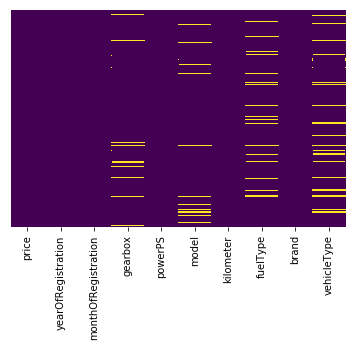

In [32]:
#Shows the distribution of null values
sns.heatmap(cars.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [33]:
cars.head()
cars['vehicleType'].value_counts()

#Filling missing values
def fill_zeros_with_last(arr):
    last_val = None
    for i in range(arr.size):
        if arr[i]:
            last_val = arr[i]
        elif last_val is not None:
            arr[i] = last_val
fill_zeros_with_last(cars['vehicleType'])           

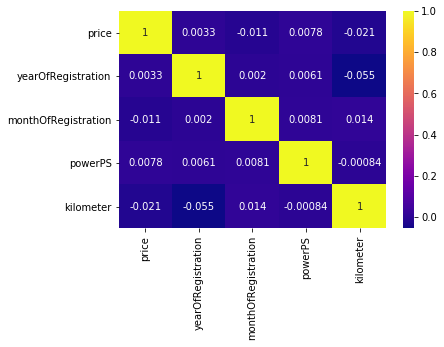

In [34]:
sns.heatmap(cars.corr(),annot=True,cmap='plasma')

In [35]:
cars['fuelType'].value_counts()

#Filling null values
cars['fuelType'] = cars['fuelType'].fillna('benzin')

In [36]:
#Use np.random.choose to fill null values in gearbox
cars['gearbox'].isnull().value_counts()
cars['gearbox'] = cars['gearbox'].fillna('manuell')
cars['gearbox'].isnull().any()
cars.drop(['model'],inplace=True,axis=1)

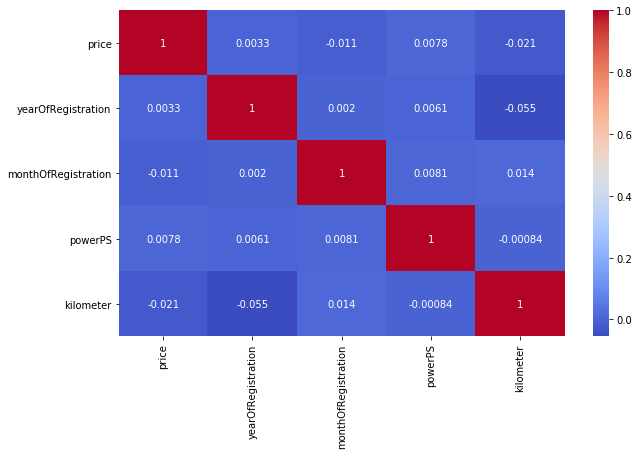

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(cars.corr(),annot=True,cmap='coolwarm')

In [38]:
cars = pd.get_dummies(cars,columns=['fuelType','vehicleType','gearbox','brand'],drop_first=True)
cars.head()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,400,1992,8,89,60000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3500,1996,0,150,125000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2200,1998,0,150,150000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4000,2006,7,0,150000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2600,2002,7,41,150000,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


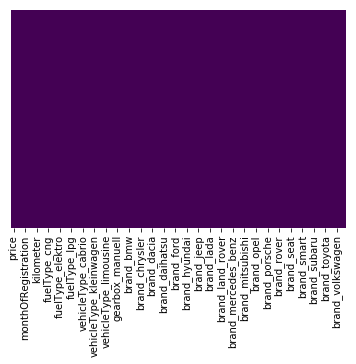

In [39]:
#Shows the distribution of null values after filling/dropping null values.
#Clear map indicates no null values present.
sns.heatmap(cars.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [40]:
#Splitting into features and labels

X = cars.iloc[:, 1:].values
y = cars.iloc[:, 0].values

# Linear Regression

In [41]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#fit the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#predict the test set results
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

rmse_lin_reg = rmse
rmse_lin_reg

10322.34364036859

# KNN Regression 

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_knnreg = sqrt(mean_squared_error(y_test, y_pred))
rmse_knnreg

27777.123967705946

# Random Forest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor
ranforreg = RandomForestRegressor()
ranforreg.fit(X_train,y_train)

y_pred = ranforreg.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_ranforreg = sqrt(mean_squared_error(y_test,y_pred))
rmse_ranforreg

28047.652747014898

# Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor
dectreereg = DecisionTreeRegressor()
dectreereg.fit(X_train,y_train)

y_pred = dectreereg.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_dectreereg = sqrt(mean_squared_error(y_test,y_pred))
rmse_dectreereg

5599.378865480072

# Feature Selection

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X, y)


from sklearn.feature_selection import SelectFromModel
abc = SelectFromModel(tree_clf, prefit = True)
x_updated = abc.transform(X)
print('Total Features count:', np.array(X).shape[1])
print('Selected Features: ' ,np.array(x_updated).shape[1])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_updated, y, test_size = 0.2, random_state = 0)


Total Features count: 57
Selected Features:  4


# Linear Reg with Feature Selection

In [46]:
#fit the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#predict the test set results
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_linreg_FeatSel = sqrt(mean_squared_error(y_test, y_pred))
rmse_linreg_FeatSel

8592.223267606501

# KNN Regression with Feature Selection

In [47]:

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_knnreg_FeatSel=sqrt(mean_squared_error(y_test, y_pred_knn))
rmse_knnreg_FeatSel

33176.8303751749

# Random Forest with Feature Selection

In [48]:
from sklearn.ensemble import RandomForestRegressor
ranforreg = RandomForestRegressor()
ranforreg.fit(X_train,y_train)

y_pred = ranforreg.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_ranforreg_FeatSel = sqrt(mean_squared_error(y_test,y_pred))
rmse_ranforreg_FeatSel

55543.87345475386

# Decision Tree with Linear Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor
dectreereg = DecisionTreeRegressor()
dectreereg.fit(X_train,y_train)

y_pred = dectreereg.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_dectreereg_FeatSel = sqrt(mean_squared_error(y_test,y_pred))
rmse_dectreereg_FeatSel

8609.299909942603

In [50]:
model=['Linear Reg','KNN Reg','Random Forest Regression','Decision Tree Regression','Linear Reg with Feature Selection','KNN Reg with Feature Selection','Random Forest with Feature Selection','Decision Tree with Feature Selection']
rmse = [rmse_lin_reg,rmse_knnreg,rmse_ranforreg,rmse_dectreereg,rmse_linreg_FeatSel,rmse_knnreg_FeatSel,rmse_ranforreg_FeatSel,rmse_dectreereg_FeatSel]
result=pd.DataFrame(list(zip(model,rmse)),columns=['Model','RMSE'])
result

,Model,RMSE
0,Linear Reg,10322.343640
1,KNN Reg,27777.123968
2,Random Forest Regression,28047.652747
3,Decision Tree Regression,5599.378865
4,Linear Reg with Feature Selection,8592.223268
5,KNN Reg with Feature Selection,33176.830375
6,Random Forest with Feature Selection,55543.873455
7,Decision Tree with Feature Selection,8609.299910


In [51]:
result.min()

Model    Decision Tree Regression
RMSE                      5599.38
dtype: object